In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### continuous peaks

In [13]:
opt = 'GA'
p=200
ma=100
mu=50
cpfile = 'cp/cp-%s-%d-%d-%d.csv' % (opt, p, ma, mu)
ga = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
ga["p"] = p
ga["ma"] = ma
ga["mu"] = mu
ga["params"] = "pop=%d, mate=%d, mutate=%d" % (p, ma, mu)
ga["opt"] = opt

In [14]:
opt = 'MMC'
s=200
k=10
cpfile = 'cp/cp-%s-%d-%d.csv' % (opt, s, k)
mmc = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
mmc["samples"] = s
mmc["tokeep"] = k
mmc["params"] = "samples=%d, tokeep=%d" % (s, k)
mmc["opt"] = "MIMIC"

In [15]:
opt = 'RHC'
i=20000
t=5
cpfile = 'cp/cp-%s-%d-%d.csv' % (opt, i, t)
rhc = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
rhc["iterations"] = i
rhc["try"] = t
rhc["params"] = "iterations=%d, try=%d" % (i, t)
rhc["opt"] = opt

In [44]:
opt = 'SA'
t="1E10"
c="0.95"
cpfile = 'cp/cp-%s-%s-%s.csv' % (opt, t, c)
sa = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
sa["t"] = t
sa["cooling"] = c
sa["params"] = "t=%s, cooling=%s" % (t, c)
sa["opt"] = opt

In [42]:
cp = pd.DataFrame()
opt = 'SA'
for t in ["1E10"]:
    for c in [0.15, 0.35, 0.55, 0.75, 0.95]:
        cpfile = 'cp/cp-%s-%s-%.2f.csv' % (opt, t, c)
        tmp = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
        tmp["t"] = t
        tmp["cooling"] = c
        tmp["params"] = "t=%s, cooling=%.2f" % (t, c)
        if cp.shape[0] == 0:
            cp = tmp.copy(deep=True)
        else:
            cp = cp.append(tmp)

In [43]:
cp.loc[cp["score"] == cp["score"].max(),["params"]].groupby(["params"]).size()

params
t=1E10, cooling=0.55    623
t=1E10, cooling=0.75    359
t=1E10, cooling=0.95    569
dtype: int64

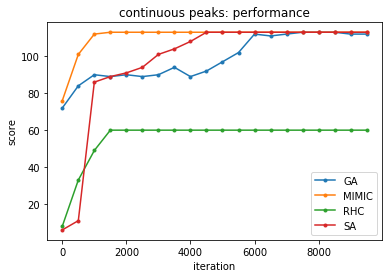

In [45]:
legend = []
for out in [ga, mmc, rhc, sa]:
    ind = np.array(range(1000)) % 50 == 0
    x = out.iloc[ind,0]
    y = out.iloc[ind,1]
    plt.plot(x, y, '.-')
    legend.append(out.iloc[0,-1])

plt.legend(legend, loc="best")
plt.ylabel('score')
plt.xlabel('iteration')
plt.title('continuous peaks: performance')
plt.gcf()
plt.savefig('cpscore.png')
plt.show()

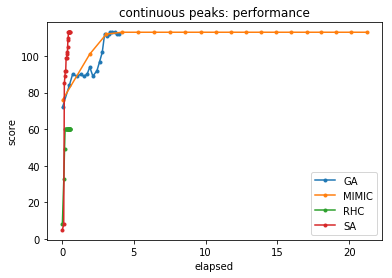

In [40]:
legend = []
for out in [ga, mmc, rhc, sa]:
    ind = np.array(range(1000)) % 50 == 0
    x = out.iloc[ind,2]
    y = out.iloc[ind,1]
    plt.plot(x, y, '.-')
    legend.append(out.iloc[0,-1])

plt.legend(legend, loc="best")
plt.ylabel('score')
plt.xlabel('elapsed')
plt.title('continuous peaks: performance')
plt.gcf()
plt.savefig('cpelapsed.png')
plt.show()

In [34]:
mmc.loc[mmc["elapsed"] < 1.0,:]

,i,score,elapsed,samples,tokeep,params,opt
0,0,76.0,0.032,200,10,"samples=200, tokeep=10",MIMIC
1,10,79.0,0.153,200,10,"samples=200, tokeep=10",MIMIC
2,20,82.0,0.248,200,10,"samples=200, tokeep=10",MIMIC
3,30,83.0,0.344,200,10,"samples=200, tokeep=10",MIMIC
4,40,84.0,0.430,200,10,"samples=200, tokeep=10",MIMIC
5,50,85.0,0.492,200,10,"samples=200, tokeep=10",MIMIC
6,60,84.0,0.548,200,10,"samples=200, tokeep=10",MIMIC
7,70,92.0,0.608,200,10,"samples=200, tokeep=10",MIMIC
8,80,94.0,0.671,200,10,"samples=200, tokeep=10",MIMIC
9,90,94.0,0.723,200,10,"samples=200, tokeep=10",MIMIC
